In [2]:
"""import necessary modules"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Load and Process the Data

In [3]:
"""load the dataset"""
dataframe = pd.read_csv('AirPassengers.csv')
dataframe.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
"""convert date to datetime"""
dataframe["Month"] = pd.to_datetime(dataframe["Month"])

In [5]:
"""first five rows of the update dataset"""
dataframe.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
"""describe the data"""
dataframe.describe()

,Month,#Passengers
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


In [7]:
print("The shape of the data: {}\nand the type: {}".format(dataframe.shape, type(dataframe)))

The shape of the data: (144, 2)
and the type: <class 'pandas.core.frame.DataFrame'>


In [8]:
"""set months as index"""
dataframe.set_index("Month", inplace = True)

In [9]:
"""first five rows of the updated datset"""
dataframe.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
"""info about the update data"""
dataframe.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
print("The shape of the update data: {}\nand the type: {}".format(dataframe.shape, type(dataframe)))

The shape of the update data: (144, 1)
and the type: <class 'pandas.core.frame.DataFrame'>


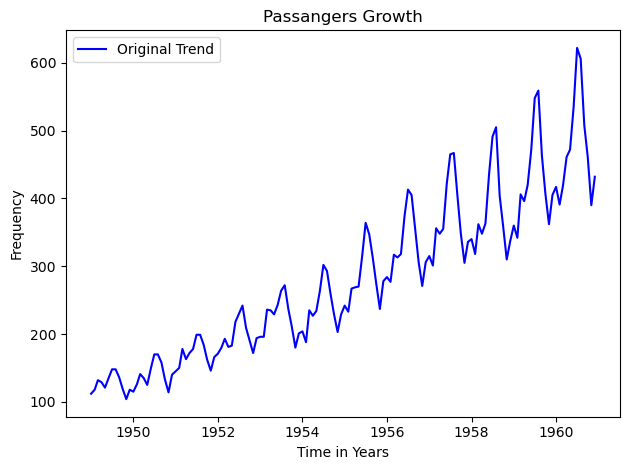

In [12]:
"""plot the dataframe"""
plt.plot(dataframe, c="b", label="Original Trend")
plt.title("Passangers Growth")
plt.xlabel("Time in Years")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig("Passengers growths over time.png", dpi=300)
plt.show()

In [13]:
"""convert pandas dataframe to numpy array"""
dataset = dataframe.values
dataset = dataset.astype('float32')

In [14]:
print("The shape of the data: {}\nand the type: {}".format(dataset.shape, type(dataset)))

The shape of the data: (144, 1)
and the type: <class 'numpy.ndarray'>


In [15]:
"""normalize the dataset"""
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [16]:
print("Transformed dataset:\n",dataset)

Transformed dataset:
 [[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274

In [17]:
print("Shape of the transformed dataset: ", dataset.shape)

Shape of the transformed dataset:  (144, 1)


In [18]:
"""split data into 60% for train and 40% for test sets"""
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [19]:
"""convert an array of values into an input and output sets"""
def to_sequences(dataset, seq_size=1):
    """
    Function to convert time series data to dataset matrix to train a neural network model

    Parameters
    ----------
    dataset: sequence of data points
             array type
    seq_size: number of sequence, default value one
             int type
    Output
    ------
    Input and Output data as an array 
    """
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
    return np.array(x),np.array(y)

In [20]:
"""prepare data for FFN"""
seq_size = 10
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [25]:
"""details on updated train and test dataset"""
print("Train data dimensions:\nInput shape: {}\nOutput shape: {}".format(trainX.shape, trainY.shape))
print("\nTest data dimensions:\nInput shape: {}\nOutput shape: {}".format(testX.shape, testY.shape))

Train data dimensions:
Input shape: (84, 10)
Output shape: (84,)

Test data dimensions:
Input shape: (38, 10)
Output shape: (38,)


## Define, Train, and Validate a Feedforward Neural Network Model

In [26]:
"""creating and fit a dense model"""
print("Building a deep learning model: FFNn")
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
print(model.summary())

Building a deep learning model: FFNn
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [27]:
"""fit the model"""
model.fit(trainX, trainY, validation_data=(testX, testY), verbose=2, epochs=100)

Epoch 1/100
3/3 - 1s - loss: 0.0589 - acc: 0.0119 - val_loss: 0.2606 - val_acc: 0.0000e+00 - 1s/epoch - 370ms/step
Epoch 2/100
3/3 - 0s - loss: 0.0405 - acc: 0.0119 - val_loss: 0.1812 - val_acc: 0.0000e+00 - 78ms/epoch - 26ms/step
Epoch 3/100
3/3 - 0s - loss: 0.0264 - acc: 0.0119 - val_loss: 0.1195 - val_acc: 0.0000e+00 - 87ms/epoch - 29ms/step
Epoch 4/100
3/3 - 0s - loss: 0.0165 - acc: 0.0119 - val_loss: 0.0706 - val_acc: 0.0000e+00 - 80ms/epoch - 27ms/step
Epoch 5/100
3/3 - 0s - loss: 0.0095 - acc: 0.0119 - val_loss: 0.0397 - val_acc: 0.0263 - 51ms/epoch - 17ms/step
Epoch 6/100
3/3 - 0s - loss: 0.0062 - acc: 0.0119 - val_loss: 0.0262 - val_acc: 0.0263 - 63ms/epoch - 21ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0062 - acc: 0.0119 - val_loss: 0.0235 - val_acc: 0.0263 - 61ms/epoch - 20ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0070 - acc: 0.0119 - val_loss: 0.0233 - val_acc: 0.0263 - 68ms/epoch - 23ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0069 - acc: 0.0119 - val_loss: 0.0219 - val_acc: 0.0263 - 

In [28]:
"""make predictions"""
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 5ms/step


In [29]:
"""Estimate model performance"""
trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

In [30]:
"""calculate root mean squared error"""
trainScore = math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 12.73 RMSE
Test Score: 24.64 RMSE


In [31]:
"""shift train and test predictions to allign the plot with x axis with the original dataset"""
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict

In [32]:
"""combine predictions with original data"""
dataframe["trainPredict"] = trainPredictPlot
dataframe["testPredict"] = testPredictPlot

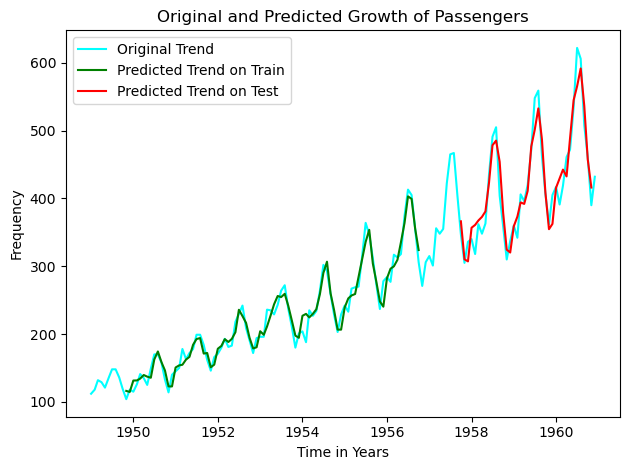

In [33]:
"""plot the original and predicted data"""
#plt.gca().set_facecolor("#f5e6ff")
plt.plot(dataframe["#Passengers"], c="cyan",label="Original Trend")
plt.plot(dataframe["trainPredict"], c="g",label="Predicted Trend on Train")
plt.plot(dataframe["testPredict"], c="r",label="Predicted Trend on Test")
plt.xlabel("Time in Years")
plt.ylabel("Frequency")
plt.legend()
plt.title("Original and Predicted Growth of Passengers")
plt.tight_layout()
plt.savefig("Original and Predicted Trends.png", dpi=300)
plt.show()